# Caso: US Permanent Visa Applications

Integrantes:
- Contreras Corrales, Roger
- Cuya Cabanillas, Juan Manuel
- Falconi Trauco, Fiorella
- Hilario López, Cristhian

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Realizamos la lectrua de la información y procedeomos a modificar las fechas a valores legibles
datos = pd.read_csv('us_perm_visas.csv',low_memory=False,
        parse_dates=['decision_date','case_received_date'])

# Descripción del conjunto de datos

Número y tipo de características (binarias, discretas, continuas, etc.)

In [3]:
# Número de atributos o características y número de filas
print("Número de atributos/columnas:",len(datos.columns))
print("Número de filas:",len(datos))

Número de atributos/columnas: 154
Número de filas: 374362


In [4]:
# Tipos de datos existentes en las características
datos.dtypes.value_counts()

object            142
float64            10
datetime64[ns]      2
dtype: int64

In [5]:
# descripcion de las caracterísiticas. Si el dataframe tiene diferentes tipos de datos, 
# sólo se consideran los datos numéricos 
datos.head()

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaT,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaT,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaT,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaT,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaT,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN


Todo el set de datos se compone de 374362 filas o registros de aplicaciones. Mientras que se cuentan con 154 atributos los cuales se dividen entre 142 valores categóricos, 10 numéricos y 2 de fechas

In [6]:
print(datos.columns.values)

['add_these_pw_job_title_9089' 'agent_city' 'agent_firm_name'
 'agent_state' 'application_type' 'case_no' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'country_of_citzenship' 'decision_date'
 'employer_address_1' 'employer_address_2' 'employer_city'
 'employer_country' 'employer_decl_info_title' 'employer_name'
 'employer_num_employees' 'employer_phone' 'employer_phone_ext'
 'employer_postal_code' 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'foreign_worker_info_education_other'
 'foreign_worker_info_inst' 'foreign_worker_info_major'
 'foreign_worker_info_postal_code' 'foreign_worker_info_rel_occup_exp'
 'foreign_worker_info_req_experience' 'foreign_worker_info_state'
 'foreign_worker_info_training_comp' 'foreign_worker_ownership_interest'
 'foreign_worker_yr_rel_edu_completed' 'fw_info_alt_edu_experience'

In [7]:
# descripción de los datos no numéricos 
resultadobin = datos.describe(include=[np.object])

# Se hace una transpuesta de la descripción obtenida. 
# De la descripción sólo se toma las dos primeras filas 
# para toda la data obtenida
transpuesta = resultadobin[:2].T

# Para obtener las características binarias. 
# Se filtran aquellas características con sólo dos posibles valores. 
columnasbinarias = transpuesta[transpuesta.unique==2]
columnasbinarias

,count,unique
foreign_worker_ownership_interest,88638,2
fw_ownership_interest,150445,2
ji_foreign_worker_live_on_premises,88637,2
ji_fw_live_on_premises,150446,2
ji_live_in_domestic_service,239080,2
ji_offered_to_sec_j_foreign_worker,88637,2
ji_offered_to_sec_j_fw,150446,2
job_info_alt_combo_ed_exp,239058,2
job_info_alt_field,239059,2
job_info_combo_occupation,239083,2


## Pre-Procesamiento de datos

In [8]:
# Número de atributos o características y número de filas
def getInfodata(data): 
    print("Número de atributos/columnas:",len(datos.columns))
    print("Número de filas:",len(datos))

In [9]:
# Porcentaje de valores faltantes por columna
def getOmisionColumnas(data):
    index=0
    for column in data.columns:
        index=index+1
        print(index,". El Attributo '",column,"' presenta ",  round(data[column].isnull().sum()*100/len(data),2), "% de valores nulos")

In [10]:
getInfodata(datos)

Número de atributos/columnas: 154
Número de filas: 374362


In [11]:
# Tipos de datos existentes en las características
datos.dtypes.value_counts()

object            142
float64            10
datetime64[ns]      2
dtype: int64

Todo el set de datos se compone de 374362 filas o registros de aplicaciones. Mientras que se cuentan con 154 atributos los cuales se dividen entre 142 valores categóricos, 10 numéricos y 2 de fechas

# Limpieza de datos y Evaluación de posible data duplicada o separada
Se trabajo en base al kernel US Permanent Visa Applications_v1.1 de Lukasz Zawieska https://www.kaggle.com/elzawie/us-permanent-visa-applications-v1-1

In [12]:
print(datos.columns.values)

['add_these_pw_job_title_9089' 'agent_city' 'agent_firm_name'
 'agent_state' 'application_type' 'case_no' 'case_number'
 'case_received_date' 'case_status' 'class_of_admission'
 'country_of_citizenship' 'country_of_citzenship' 'decision_date'
 'employer_address_1' 'employer_address_2' 'employer_city'
 'employer_country' 'employer_decl_info_title' 'employer_name'
 'employer_num_employees' 'employer_phone' 'employer_phone_ext'
 'employer_postal_code' 'employer_state' 'employer_yr_estab'
 'foreign_worker_info_alt_edu_experience'
 'foreign_worker_info_birth_country' 'foreign_worker_info_city'
 'foreign_worker_info_education' 'foreign_worker_info_education_other'
 'foreign_worker_info_inst' 'foreign_worker_info_major'
 'foreign_worker_info_postal_code' 'foreign_worker_info_rel_occup_exp'
 'foreign_worker_info_req_experience' 'foreign_worker_info_state'
 'foreign_worker_info_training_comp' 'foreign_worker_ownership_interest'
 'foreign_worker_yr_rel_edu_completed' 'fw_info_alt_edu_experience'

# 1. case_number y case_no
donde la data que se encuentra en uno no se encuentra en la otra, con lo que serían complementarias

In [13]:
data=pd.DataFrame()
data['number']=datos['case_number']
data['no']=datos['case_no']
data['cantidad'] = data.apply(lambda x: x.count(), axis=1)

In [14]:
print('Total de registros: ',len(data))
data.loc[data['cantidad'] ==1].count()

Total de registros:  374362


number      239093
no          135269
cantidad    374362
dtype: int64

Se procederá a eliminar la data de ambas columnas y crear una nueva en función a la data de estos dos campos

In [15]:
datos['case_number_new']=datos['case_number']
datos['case_number_new']
mask = datos['case_number_new'].isnull()
column_name = 'case_number_new'
datos.loc[mask, column_name] = datos['case_no']

In [16]:
datos.drop(['case_number','case_no'], axis=1,inplace=True)
getInfodata(datos)

Número de atributos/columnas: 153
Número de filas: 374362


# 2. case_status
Dentro del modelo se identifican 4 tipos de case_status. Para el presente experimento, se tomarán solo los casos con status Certified y Denied. Para los casos de Withdran, estos no serán considerados, por lo cual serán retirados del dataset. Para los casos de Certified-Expired, debido a la información revisada, esots corresponden a casos que una vez obtevieron el estado Certified, debieron presentar el formulario I-140 en los siguientes 6 meses. Pasado este tiempo, se procede al cambio del estado. En ese sentido, este grupo será considerado como Certified.

In [17]:
datos.case_status.value_counts()

Certified            181933
Certified-Expired    148586
Denied                25649
Withdrawn             18194
Name: case_status, dtype: int64

In [18]:
datos = datos[datos.case_status != 'Withdrawn']
datos.case_status.value_counts()

Certified            181933
Certified-Expired    148586
Denied                25649
Name: case_status, dtype: int64

In [19]:
datos.loc[datos['case_status'] == 'Certified-Expired', 'case_status'] = 'Certified'
datos.case_status.value_counts()

Certified    330519
Denied        25649
Name: case_status, dtype: int64

# 3. filas y columnas nulas
donde la data que se encuentra en uno no se encuentra en la otra, con lo que serían complementarias

In [20]:
print("Datos iniciales:\n")
getInfodata(datos)
datos = datos.dropna(axis=0, how='all');
datos = datos.dropna(axis=1, how='all');
print("\nDatos finales:\n")
getInfodata(datos)

Datos iniciales:

Número de atributos/columnas: 153
Número de filas: 356168

Datos finales:

Número de atributos/columnas: 153
Número de filas: 356168


No existen filas ni columnas con todos los valores nulos

# 4. columnas con más del 85% de omisiones
Se define como porcentaje mínimo para considerar un atributo que tenga al menos el 85% de sus filas con información

In [21]:
# Porcentaje de omisiones de cada columna
getOmisionColumnas(datos)

1 . El Attributo ' add_these_pw_job_title_9089 ' presenta  89.01 % de valores nulos
2 . El Attributo ' agent_city ' presenta  43.08 % de valores nulos
3 . El Attributo ' agent_firm_name ' presenta  44.26 % de valores nulos
4 . El Attributo ' agent_state ' presenta  43.95 % de valores nulos
5 . El Attributo ' application_type ' presenta  64.39 % de valores nulos
6 . El Attributo ' case_received_date ' presenta  35.61 % de valores nulos
7 . El Attributo ' case_status ' presenta  0.0 % de valores nulos
8 . El Attributo ' class_of_admission ' presenta  5.92 % de valores nulos
9 . El Attributo ' country_of_citizenship ' presenta  5.41 % de valores nulos
10 . El Attributo ' country_of_citzenship ' presenta  94.6 % de valores nulos
11 . El Attributo ' decision_date ' presenta  0.0 % de valores nulos
12 . El Attributo ' employer_address_1 ' presenta  0.01 % de valores nulos
13 . El Attributo ' employer_address_2 ' presenta  39.6 % de valores nulos
14 . El Attributo ' employer_city ' presenta  

116 . El Attributo ' recr_info_professional_occ ' presenta  35.62 % de valores nulos
117 . El Attributo ' recr_info_radio_tv_ad_from ' presenta  94.52 % de valores nulos
118 . El Attributo ' recr_info_radio_tv_ad_to ' presenta  94.52 % de valores nulos
119 . El Attributo ' recr_info_second_ad_start ' presenta  37.3 % de valores nulos
120 . El Attributo ' recr_info_sunday_newspaper ' presenta  37.26 % de valores nulos
121 . El Attributo ' recr_info_swa_job_order_end ' presenta  37.3 % de valores nulos
122 . El Attributo ' recr_info_swa_job_order_start ' presenta  37.29 % de valores nulos
123 . El Attributo ' refile ' presenta  69.59 % de valores nulos
124 . El Attributo ' ri_1st_ad_newspaper_name ' presenta  36.25 % de valores nulos
125 . El Attributo ' ri_2nd_ad_newspaper_name ' presenta  36.26 % de valores nulos
126 . El Attributo ' ri_2nd_ad_newspaper_or_journal ' presenta  37.29 % de valores nulos
127 . El Attributo ' ri_campus_placement_from ' presenta  91.92 % de valores nulos
128

In [22]:
# Vamos a filtrar solo aquellas columnas que tienen al menos un 85% de valores no perdidos
numPermitido = len(datos)*0.85
datos = datos.loc[:, datos.isnull().sum() <= numPermitido]
datos.shape

(356168, 120)

In [23]:
getOmisionColumnas(datos)

1 . El Attributo ' agent_city ' presenta  43.08 % de valores nulos
2 . El Attributo ' agent_firm_name ' presenta  44.26 % de valores nulos
3 . El Attributo ' agent_state ' presenta  43.95 % de valores nulos
4 . El Attributo ' application_type ' presenta  64.39 % de valores nulos
5 . El Attributo ' case_received_date ' presenta  35.61 % de valores nulos
6 . El Attributo ' case_status ' presenta  0.0 % de valores nulos
7 . El Attributo ' class_of_admission ' presenta  5.92 % de valores nulos
8 . El Attributo ' country_of_citizenship ' presenta  5.41 % de valores nulos
9 . El Attributo ' decision_date ' presenta  0.0 % de valores nulos
10 . El Attributo ' employer_address_1 ' presenta  0.01 % de valores nulos
11 . El Attributo ' employer_address_2 ' presenta  39.6 % de valores nulos
12 . El Attributo ' employer_city ' presenta  0.0 % de valores nulos
13 . El Attributo ' employer_country ' presenta  35.63 % de valores nulos
14 . El Attributo ' employer_decl_info_title ' presenta  35.63 % d

112 . El Attributo ' ri_posted_notice_at_worksite ' presenta  35.64 % de valores nulos
113 . El Attributo ' schd_a_sheepherder ' presenta  35.62 % de valores nulos
114 . El Attributo ' us_economic_sector ' presenta  66.06 % de valores nulos
115 . El Attributo ' wage_offer_from_9089 ' presenta  30.24 % de valores nulos
116 . El Attributo ' wage_offer_to_9089 ' presenta  80.13 % de valores nulos
117 . El Attributo ' wage_offer_unit_of_pay_9089 ' presenta  30.54 % de valores nulos
118 . El Attributo ' wage_offered_from_9089 ' presenta  69.79 % de valores nulos
119 . El Attributo ' wage_offered_unit_of_pay_9089 ' presenta  81.27 % de valores nulos
120 . El Attributo ' case_number_new ' presenta  0.0 % de valores nulos


# 5. columnas derivadas
En función a la información brindada, se generarán nuevas columnas y se estandarizarán las que correspondan

In [24]:
datos['year'] = datos['decision_date'].dt.year

In [25]:
datos['employer_city'] = datos['employer_city'].str.upper()
datos['employer_city'].value_counts().head(12)

NEW YORK           17198
COLLEGE STATION    11985
SANTA CLARA        10519
SAN JOSE            9147
REDMOND             8485
MOUNTAIN VIEW       8121
HOUSTON             6720
SAN FRANCISCO       6352
SUNNYVALE           6104
PLANO               5607
CHICAGO             5561
SEATTLE             5051
Name: employer_city, dtype: int64

In [26]:
#Estandarización de los cargos
datos['job_info_job_title'].value_counts()[:30]

Software Engineer                   14372
Computer Systems Analyst - V         4747
Senior Software Engineer             3801
Computer Systems Analyst - II        3416
Software Developer                   2880
Assistant Professor                  2604
Programmer Analyst                   2534
Computer Systems Analyst - IV        2496
Systems Analyst                      2034
Software Development Engineer II     1630
Poultry Processing Worker            1594
Component Design Engineer            1064
Poultry Processor                    1037
Business Analyst                      963
software engineer                     932
SOFTWARE ENGINEER                     877
Senior Programmer Analyst             862
Sr. Software Engineer                 847
Senior Software Developer             817
Commercial Cleaner                    802
Process Engineer                      746
Accountant                            719
Computer Programmer                   687
Computer Systems Analyst          

In [27]:
datos['job_info_job_title'] = datos['job_info_job_title'].str.lower()
datos['job_info_job_title'] = datos['job_info_job_title'].astype(str).str.split('-').str[0]
datos['job_info_job_title'] = datos['job_info_job_title'].astype(str).str.split('ii').str[0]
datos['job_info_job_title'] = datos['job_info_job_title'].astype(str).str.split('/').str[0]
datos['job_info_job_title'] = datos['job_info_job_title'].astype(str).str.strip()
datos['job_info_job_title'] = datos['job_info_job_title'].str.replace('sr.', 'senior')
datos['job_info_job_title'].replace(["NaN", 'NaT','nan'], np.nan, inplace = True)
datos['job_info_job_title'].value_counts()[:20]

software engineer                18582
computer systems analyst         12054
senior software engineer          5802
software developer                4501
programmer analyst                3763
assistant professor               2869
software development engineer     2766
systems analyst                   2587
senior programmer analyst         1884
senior software developer         1625
poultry processing worker         1596
business analyst                  1533
poultry processor                 1153
project manager                   1066
component design engineer         1064
accountant                         899
commercial cleaner                 846
database administrator             838
senior systems analyst             835
computer programmer                813
Name: job_info_job_title, dtype: int64

In [28]:
# estandarizacion de los sueldos y unidades de aplicacion del sueldo
datos[['pw_amount_9089','pw_unit_of_pay_9089']].head(20)

,pw_amount_9089,pw_unit_of_pay_9089
0,75629.0,yr
1,37024.0,yr
2,47923.0,yr
3,10.97,hr
4,94890.0,yr
5,37024.0,yr
6,47083.33,yr
7,36733.0,yr
8,44824.0,yr
9,12.86,hr


In [29]:
datos['pw_amount_9089'] = datos['pw_amount_9089'].str.replace(",","") 

for unit in datos.pw_unit_of_pay_9089.unique():
    if unit == "hr" or unit == "Hour":
        datos.loc[datos['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = datos['pw_amount_9089'].apply(lambda x: float(x) * 8 * 250)
        datos.loc[datos['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = datos['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year") 
    elif unit == "wk" or unit == "Week":
        datos.loc[datos['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = datos['pw_amount_9089'].apply(lambda x: float(x) * 50)
        datos.loc[datos['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = datos['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "mth" or unit == "Month":
        datos.loc[datos['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = datos['pw_amount_9089'].apply(lambda x: float(x) * 12)
        datos.loc[datos['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = datos['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit == "bi" or unit == "Bi-Weekly":  
        datos.loc[datos['pw_unit_of_pay_9089'] == unit, 'pw_amount_9089'] = datos['pw_amount_9089'].apply(lambda x: float(x) * 25)
        datos.loc[datos['pw_unit_of_pay_9089'] == unit, 'pw_unit_of_pay_9089'] = datos['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    elif unit =="yr":
         datos.loc[datos['pw_unit_of_pay_9089'] == unit ,'pw_unit_of_pay_9089'] = datos['pw_unit_of_pay_9089'].replace(to_replace = unit, value = "Year")
    else:
        continue
        
#Reemplazamos los valores con la media
datos['pw_amount_9089']= datos['pw_amount_9089'].fillna((datos['pw_amount_9089'].median()))

#Se formatea el valor de los montos
datos['pw_amount_9089'] = datos.pw_amount_9089.astype(float)

datos[['pw_amount_9089','pw_unit_of_pay_9089']].head(20)

,pw_amount_9089,pw_unit_of_pay_9089
0,75629.00,Year
1,37024.00,Year
2,47923.00,Year
3,21940.00,Year
4,94890.00,Year
5,37024.00,Year
6,47083.33,Year
7,36733.00,Year
8,44824.00,Year
9,25720.00,Year


In [30]:
with pd.option_context('float_format', '{:.2f}'.format): print(datos.pw_amount_9089.describe())

count      356168.00
mean       469624.51
std       7679620.28
min             7.50
25%         67808.00
50%         86278.00
75%        104790.00
max     495748000.00
Name: pw_amount_9089, dtype: float64


In [31]:
# agrupamos en categorias los salarios para una mayor facilidad
datos['remuneration'] = pd.cut(datos['pw_amount_9089'], [0, 30000, 60000,90000,120000,150000,180000,210000,240000,270000,495748000], right=False, labels=["0-30k", "30-60k","60-90k","90-120k","120-150k","150-180k","180-210k","210-240k","240-270k","270k+"])
salary = datos['remuneration'].value_counts()
salary.iloc[np.argsort(salary.index)]

0-30k        19810
30-60k       47493
60-90k      133050
90-120k     112631
120-150k     30532
150-180k      7094
180-210k      3801
210-240k       604
240-270k        29
270k+         1123
Name: remuneration, dtype: int64

In [32]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356168 entries, 0 to 374353
Columns: 122 entries, agent_city to remuneration
dtypes: category(1), datetime64[ns](2), float64(9), int64(1), object(109)
memory usage: 341.9+ MB


In [33]:
#Reemplazamos los valores de case_status por 1 para certified y 0 para denied
datos.loc[datos.case_status == 'Certified', 'case_status'] = 1
datos.loc[datos.case_status == 'Denied', 'case_status'] = 0
datos['case_status'] = datos['case_status'].astype(int)


#Completamos el estado con la moda
datos['employer_state'] = datos['employer_state'].fillna(datos['employer_state'].mode()[0]);

In [34]:
# mapeamos los estados
state_abbrevs = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP', 
    'Palau': 'PW', 
    'Puerto Rico': 'PR', 
    'Virgin Islands': 'VI', 
    'District of Columbia': 'DC'
}

us_state_abbrev = {k.upper(): v for k, v in state_abbrevs.items()}
datos['employer_state'].replace(us_state_abbrev, inplace=True)
datos.employer_state = datos.employer_state.astype(str)

In [35]:
datos['pw_soc_code'] = datos['pw_soc_code'].str.replace('.','')
datos['pw_soc_code'] = datos['pw_soc_code'].str.replace('-','')
datos['pw_soc_code'] = datos['pw_soc_code'].astype(str).str[0:6]
datos['pw_soc_code'].value_counts()

#reemplazamos el pw_soc_code por la moda
datos.loc[datos['pw_soc_code'] == "nan",'pw_soc_code'] = datos['pw_soc_code'].mode()[0]

#reemplazamos los none por la moda
datos.loc[datos['pw_soc_code'] == "None",'pw_soc_code'] = datos['pw_soc_code'].mode()[0]

datos['pw_soc_code'] = datos['pw_soc_code'].astype(int)

In [36]:
datos['class_of_admission']=datos['class_of_admission'].fillna((datos['class_of_admission'].mode()[0]))
datos['country_of_citizenship']=datos['country_of_citizenship'].fillna((datos['country_of_citizenship'].mode()[0]))
datos['employer_city']=datos['employer_city'].fillna((datos['employer_city'].mode()[0]))
datos['pw_soc_title']=datos['pw_soc_title'].fillna((datos['pw_soc_title'].mode()[0]))
datos['job_info_work_city']=datos['job_info_work_city'].fillna((datos['job_info_work_city'].mode()[0]))
datos['job_info_work_state']=datos['job_info_work_state'].fillna((datos['job_info_work_state'].mode()[0]))
datos['pw_level_9089']=datos['pw_level_9089'].fillna((datos['pw_level_9089'].mode()[0]))
datos['pw_unit_of_pay_9089']=datos['pw_unit_of_pay_9089'].fillna((datos['pw_unit_of_pay_9089'].mode()[0]))
datos['employer_name']=datos['employer_name'].fillna((datos['employer_name'].mode()[0]))
datos['employer_name']=datos['employer_name'].astype(str).str.upper()
datos['pw_source_name_9089']=datos['pw_source_name_9089'].fillna((datos['pw_source_name_9089'].mode()[0]))
datos['remuneration']=datos['remuneration'].fillna((datos['remuneration'].mode()[0]))

In [37]:
# Vamos a filtrar solo aquellas columnas que tienen al menos un 85% de valores no perdidos
numPermitido = len(datos)*0.85
datos = datos.loc[:, datos.count() >= numPermitido]
datos.shape

(356168, 20)

In [38]:
getOmisionColumnas(datos)

1 . El Attributo ' case_status ' presenta  0.0 % de valores nulos
2 . El Attributo ' class_of_admission ' presenta  0.0 % de valores nulos
3 . El Attributo ' country_of_citizenship ' presenta  0.0 % de valores nulos
4 . El Attributo ' decision_date ' presenta  0.0 % de valores nulos
5 . El Attributo ' employer_address_1 ' presenta  0.01 % de valores nulos
6 . El Attributo ' employer_city ' presenta  0.0 % de valores nulos
7 . El Attributo ' employer_name ' presenta  0.0 % de valores nulos
8 . El Attributo ' employer_postal_code ' presenta  0.01 % de valores nulos
9 . El Attributo ' employer_state ' presenta  0.0 % de valores nulos
10 . El Attributo ' job_info_work_city ' presenta  0.0 % de valores nulos
11 . El Attributo ' job_info_work_state ' presenta  0.0 % de valores nulos
12 . El Attributo ' pw_amount_9089 ' presenta  0.0 % de valores nulos
13 . El Attributo ' pw_level_9089 ' presenta  0.0 % de valores nulos
14 . El Attributo ' pw_soc_code ' presenta  0.0 % de valores nulos
15 . E

In [39]:
# Se eliminan columnas derivadas de otras
columnasEliminar = ['decision_date','employer_address_1', 'employer_postal_code', 'job_info_work_city', 
                    'job_info_work_state', 'pw_amount_9089', 'pw_soc_title', 
                    'pw_unit_of_pay_9089', 'case_number_new'];
datos=datos.drop(columnasEliminar, axis=1);

In [40]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356168 entries, 0 to 374353
Data columns (total 11 columns):
case_status               356168 non-null int32
class_of_admission        356168 non-null object
country_of_citizenship    356168 non-null object
employer_city             356168 non-null object
employer_name             356168 non-null object
employer_state            356168 non-null object
pw_level_9089             356168 non-null object
pw_soc_code               356168 non-null int32
pw_source_name_9089       356168 non-null object
year                      356168 non-null int64
remuneration              356168 non-null category
dtypes: category(1), int32(2), int64(1), object(7)
memory usage: 37.5+ MB


In [41]:
datos.head(3)

,case_status,class_of_admission,country_of_citizenship,employer_city,employer_name,employer_state,pw_level_9089,pw_soc_code,pw_source_name_9089,year,remuneration
0,1,J-1,INDIA,NEW YORK,NETSOFT USA INC.,NY,Level II,151031,OES,2012,60-90k
1,0,B-2,INDIA,CARLSTADT,PINNACLE ENVIRONEMNTAL CORP,NY,Level I,474041,OES,2011,30-60k
2,1,H-1B,INDIA,GLEN ALLEN,"SCHNABEL ENGINEERING, INC.",VA,Level I,172051,OES,2011,30-60k


In [42]:
"""
Se codifican etiquetas con valores entre 0 y (N-1) clases. 
Lo que se busca es etiquetar los valores de las diferentes columnas. 
"""
from sklearn import preprocessing
codificadorColumnas = {}

for columna in datos.columns:
    codificador = preprocessing.LabelEncoder()
    codificador.fit(datos[columna])
    datos[columna] = codificador.transform(datos[columna])
    codificadorColumnas[columna] = codificador

## Número de muestras

Se va definir el número de muestras para el conjunto de entrenamiento y pruebas

In [43]:
X = datos.loc[:, datos.columns != 'case_status']
y = datos.case_status

In [44]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
print ('Número de muestras para el conjunto de entrenamiento', len(X_train))
print ('Número de muestras para el conjunto de pruebas', len(X_test))

Número de muestras para el conjunto de entrenamiento 267126
Número de muestras para el conjunto de pruebas 89042


In [46]:
print ('Número de muestras por clase')
print ('----------------------------')
y_train.value_counts()

Número de muestras por clase
----------------------------


1    247793
0     19333
Name: case_status, dtype: int64

## Estadística descriptiva y visualización de datos de las muestras



In [47]:
# Tipos de datos existentes en las características
X_train.dtypes.value_counts()

int64    10
dtype: int64

In [48]:
# Descripción de las características con datos de tipo numérico

X_train.describe()

,class_of_admission,country_of_citizenship,employer_city,employer_name,employer_state,pw_level_9089,pw_soc_code,pw_source_name_9089,year,remuneration
count,267126.000000,267126.000000,267126.000000,267126.000000,267126.000000,267126.000000,267126.000000,267126.000000,267126.000000,267126.000000
mean,20.146508,88.823956,2973.546753,33347.163567,27.597059,1.520683,152.369324,3.037623,3.612947,6.950630
std,6.110460,40.038984,1582.464050,19824.876746,18.060960,1.054898,142.004181,0.403522,1.358666,2.854682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,79.000000,1466.000000,15604.250000,6.000000,1.000000,93.000000,3.000000,3.000000,7.000000
50%,19.000000,79.000000,3344.000000,30635.000000,27.000000,1.000000,96.000000,3.000000,4.000000,8.000000
75%,19.000000,79.000000,4430.000000,49950.000000,44.000000,3.000000,134.000000,3.000000,5.000000,9.000000
max,56.000000,200.000000,5780.000000,69575.000000,58.000000,3.000000,768.000000,5.000000,5.000000,9.000000


In [49]:
# Visualizar los primeros datos de entrenamiento
X_train.head()

,class_of_admission,country_of_citizenship,employer_city,employer_name,employer_state,pw_level_9089,pw_soc_code,pw_source_name_9089,year,remuneration
140779,19,34,774,832,33,3,126,3,3,9
262552,19,79,2939,30619,27,1,127,3,5,8
243761,5,134,1174,29953,50,3,476,3,4,7
309551,19,79,1174,4314,50,1,96,3,5,8
257410,13,79,2328,30139,23,1,127,4,5,8


In [50]:
# funcion para crear un gráfico
def crearGrafico(data): 
    dataDiccionario = {}
    
    for value in data.dropna():
        if value in dataDiccionario:
            dataDiccionario[value] += 1
        else:
            dataDiccionario[value] = 1
            
    
    etiquetas = []
    valores = []
    
    for key, value in dataDiccionario.items():
        etiquetas.append(key)
        valores.append(value)
        
    plt.figure(figsize=(6,6))    
    sns.set_context(rc={"font.size":10,"axes.labelsize":11,"xtick.labelsize" : 11})
    plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', pctdistance = 0.9,
          rotatelabels = 90, startangle=140, labeldistance = 1.05)

% del estado de cada una de las aplicaciones para visa


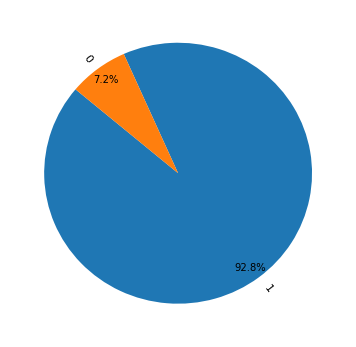

In [51]:
print ('% del estado de cada una de las aplicaciones para visa')
crearGrafico(y_train)

### Matriz de confusión

La matriz de confusión es un sumario del rendimiento de un clasificador.

<img src="http://www.nature.com/nmeth/journal/v13/n8/images/nmeth.3945-F1.jpg" style="width: 500px;"/>

Para obtener sus valores usamos el método [`metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):

In [52]:
def printMatrizConfusion(y_test, predicciones_test):
    matriz_confusion = metrics.confusion_matrix(y_test, predicciones_test)

    # Mapeo según http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    TN = matriz_confusion[0,0]
    FN = matriz_confusion[1,0]
    FP = matriz_confusion[0,1]
    TP = matriz_confusion[1,1]

    print ('              +-----------------+')
    print ('              |   Predicción    |')
    print ('              +-----------------+')
    print ('              |    +   |    -   |')
    print ('+-------+-----+--------+--------+')
    print ('| Valor |  +  |   %d |   %d   |'   % (TP, FN) )
    print ('| real  +-----+--------+--------+')
    print ('|       |  -  |   %d  |   %d  |'    % (FP, TN) )
    print ('+-------+-----+--------+--------+')
    print ()
    print ( 'Exactitud    : ', (TP+TN)/(TP+FN+FP+TN) )

# Aplicacion de Regresión logística

Aplicación del modelo de regresión logística 

In [68]:
from sklearn.linear_model import LogisticRegression

mejor_score = 0
mejor_C = None

for C in np.logspace(-2,4,10): 
    modeloIterativo = LogisticRegression(penalty='l2', C=C, random_state=0)
    modeloIterativo.fit(X_train, y_train)
    score_val_medio=modeloIterativo.score(X_test, y_test)
    if score_val_medio > mejor_score: 
        mejor_score = score_val_medio
        mejor_C = C

print ( 'Mejor Score     : ', mejor_score )
print ( 'Mejor valor C   : ', mejor_C )

modelo = LogisticRegression(penalty='l2', C=mejor_C, random_state=0)
modelo.fit(X_train, y_train)

Mejor Score     :  0.9290559511241886
Mejor valor C   :  0.21544346900318834


LogisticRegression(C=0.21544346900318834, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [69]:
from sklearn import metrics

predicciones_test = modelo.predict(X_test)
num_predicciones_correctas = (y_test == predicciones_test).sum()
num_total_de_muestras = len(y_test)
exactitud = num_predicciones_correctas / num_total_de_muestras

print ( 'Predicciones correctas : ', num_predicciones_correctas )
print ( 'Número de muestras     : ', num_total_de_muestras )
print ( 'Exactitud (manual)     : ', exactitud )

# Usando scikit-learn
print ( 'Exactitud (score)      : ', modelo.score(X_test, y_test) )
print ( 'Exactitud (metrics)    : ', metrics.accuracy_score(y_test, predicciones_test) )

Predicciones correctas :  82725
Número de muestras     :  89042
Exactitud (manual)     :  0.9290559511241886
Exactitud (score)      :  0.9290559511241886
Exactitud (metrics)    :  0.9290559511241886


In [70]:
printMatrizConfusion(y_test, predicciones_test)

              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |   82698 |   28   |
| real  +-----+--------+--------+
|       |  -  |   6289  |   27  |
+-------+-----+--------+--------+

Exactitud    :  0.9290559511241886


# Aplicacion de Naive Bayes

Aplicación del modelo de Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [79]:
from sklearn import metrics

predicciones_test_bayes = model.predict(X_test)
num_predicciones_correctas = (y_test == predicciones_test_bayes).sum()
num_total_de_muestras = len(y_test)
exactitud = num_predicciones_correctas / num_total_de_muestras

print ( 'Predicciones correctas : ', num_predicciones_correctas )
print ( 'Número de muestras     : ', num_total_de_muestras )
print ( 'Exactitud (manual)     : ', exactitud )

# Usando scikit-learn
print ( 'Exactitud (score)      : ', model.score(X_test, y_test) )
print ( 'Exactitud (metrics)    : ', metrics.accuracy_score(y_test, predicciones_test_bayes) )

Predicciones correctas :  80236
Número de muestras     :  89042
Exactitud (manual)     :  0.9011028503402888
Exactitud (score)      :  0.9011028503402888
Exactitud (metrics)    :  0.9011028503402888


In [80]:
printMatrizConfusion(y_test, predicciones_test_bayes)

              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |   79056 |   3670   |
| real  +-----+--------+--------+
|       |  -  |   5136  |   1180  |
+-------+-----+--------+--------+

Exactitud    :  0.9011028503402888


# Aplicacion de Árboles de Decisión

Aplicación del modelo de Árboles de Decisión

In [81]:
from sklearn import tree

mejor_score = 0
mejor_depth = None

for depth in np.logspace(1,15,10): 
    modeloIterativo = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
    modeloIterativo.fit(X_train, y_train)
    score_val_medio=modeloIterativo.score(X_test, y_test)
    if score_val_medio > mejor_score: 
        mejor_score = score_val_medio
        mejor_depth = depth

print ( 'Mejor Score     : ', mejor_score )
print ( 'Mejor valor max_depth   : ', mejor_depth )

modelo_arbol = tree.DecisionTreeClassifier(max_depth=mejor_depth, random_state=0)
modelo_arbol.fit(X_train, y_train)

Mejor Score     :  0.9353451180341861
Mejor valor max_depth   :  10.0


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [82]:
from sklearn import metrics

predicciones_test_arbol = modelo_arbol.predict(X_test)
num_predicciones_correctas = (y_test == predicciones_test_arbol).sum()
num_total_de_muestras = len(y_test)
exactitud = num_predicciones_correctas / num_total_de_muestras

print ( 'Predicciones correctas : ', num_predicciones_correctas )
print ( 'Número de muestras     : ', num_total_de_muestras )
print ( 'Exactitud (manual)     : ', exactitud )

# Usando scikit-learn
print ( 'Exactitud (score)      : ', modelo_arbol.score(X_test, y_test) )
print ( 'Exactitud (metrics)    : ', metrics.accuracy_score(y_test, predicciones_test_arbol) )

Predicciones correctas :  83285
Número de muestras     :  89042
Exactitud (manual)     :  0.9353451180341861
Exactitud (score)      :  0.9353451180341861
Exactitud (metrics)    :  0.9353451180341861


In [83]:
printMatrizConfusion(y_test, predicciones_test_arbol)

              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |   82275 |   451   |
| real  +-----+--------+--------+
|       |  -  |   5306  |   1010  |
+-------+-----+--------+--------+

Exactitud    :  0.9353451180341861


# Aplicacion de Random Forest

Aplicación del modelo de Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

mejor_score = 0
mejor_depth = None

for depth in np.logspace(1,15,10): 
    modeloIterativo = RandomForestClassifier(max_depth=depth, random_state=0)
    modeloIterativo.fit(X_train, y_train)
    score_val_medio=modeloIterativo.score(X_test, y_test)
    if score_val_medio > mejor_score: 
        mejor_score = score_val_medio
        mejor_depth = depth

print ( 'Mejor Score     : ', mejor_score )
print ( 'Mejor valor max_depth   : ', mejor_depth )

modelo_forest = RandomForestClassifier(max_depth=mejor_depth, random_state=0)
modelo_forest.fit(X_train, y_train)

Mejor Score     :  0.9349857370679006
Mejor valor max_depth   :  10.0


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10.0, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [75]:
from sklearn import metrics

predicciones_forest = modelo_forest.predict(X_test)
num_predicciones_correctas = (y_test == predicciones_forest).sum()
num_total_de_muestras = len(y_test)
exactitud = num_predicciones_correctas / num_total_de_muestras

print ( 'Predicciones correctas : ', num_predicciones_correctas )
print ( 'Número de muestras     : ', num_total_de_muestras )
print ( 'Exactitud (manual)     : ', exactitud )

# Usando scikit-learn
print ( 'Exactitud (score)      : ', modelo_forest.score(X_test, y_test) )
print ( 'Exactitud (metrics)    : ', metrics.accuracy_score(y_test, predicciones_forest) )

Predicciones correctas :  83253
Número de muestras     :  89042
Exactitud (manual)     :  0.9349857370679006
Exactitud (score)      :  0.9349857370679006
Exactitud (metrics)    :  0.9349857370679006


In [76]:
printMatrizConfusion(y_test, predicciones_forest)

              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |   82575 |   151   |
| real  +-----+--------+--------+
|       |  -  |   5638  |   678  |
+-------+-----+--------+--------+

Exactitud    :  0.9349857370679006
